In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization
from keras.preprocessing.image import array_to_img, img_to_array

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar100

In [4]:
(X_train, y_train), (X_test, y_test)=cifar100.load_data()

169009152/169001437 [==============================] - 6s 0us/step


In [0]:
X_train=X_train/255
X_test=X_test/255

In [0]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [119]:
model=Sequential()

model.add(Conv2D(128, (3, 3), input_shape=(32,32,3), activation="relu", padding="same", strides=2))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation="relu", padding="same", strides=2))
model.add(MaxPool2D(2))
model.add(Flatten())
model.add(Dense(100, activation="softmax"))

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

history=model.fit(X_train, y_train, validation_split=0.2, epochs=10)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 11s 283us/step - loss: 3.7225 - acc: 0.1513 - val_loss: 3.2403 - val_acc: 0.2365
Epoch 2/10
40000/40000 [==============================] - 7s 183us/step - loss: 3.0541 - acc: 0.2720 - val_loss: 3.0717 - val_acc: 0.2776
Epoch 3/10
40000/40000 [==============================] - 7s 180us/step - loss: 2.7731 - acc: 0.3272 - val_loss: 2.8222 - val_acc: 0.3200
Epoch 4/10
40000/40000 [==============================] - 7s 183us/step - loss: 2.5932 - acc: 0.3614 - val_loss: 2.7606 - val_acc: 0.3367
Epoch 5/10
40000/40000 [==============================] - 7s 184us/step - loss: 2.4590 - acc: 0.3923 - val_loss: 2.7403 - val_acc: 0.3420
Epoch 6/10
40000/40000 [==============================] - 7s 181us/step - loss: 2.3629 - acc: 0.4124 - val_loss: 2.7374 - val_acc: 0.3481
Epoch 7/10
40000/40000 [==============================] - 7s 182us/step - loss: 2.2870 - acc: 0.4274 - val_loss: 2.7357 -

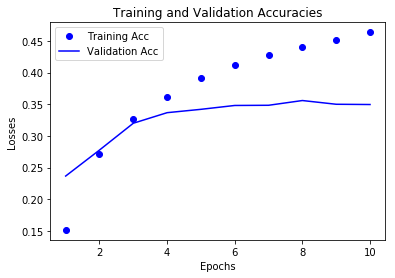

In [120]:
acc=history.history["acc"]
val_acc=history.history["val_acc"]

epochs=range(1, len(acc)+1)

plt.plot(epochs, acc, "bo", label="Training Acc")
plt.plot(epochs, val_acc, "b", label="Validation Acc")
plt.title("Training and Validation Accuracies")
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.legend()

plt.show()

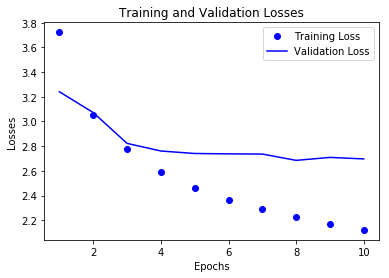

In [121]:
loss=history.history["loss"]
val_loss=history.history["val_loss"]

epochs=range(1, len(loss)+1)

plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.title("Training and Validation Losses")
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.legend()

plt.show()

In [122]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 89us/step


[2.644384497451782, 0.3631]